C:\Users\vishwa\AppData\Local\Temp\ipykernel_13332\3604107450.py:15: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True)


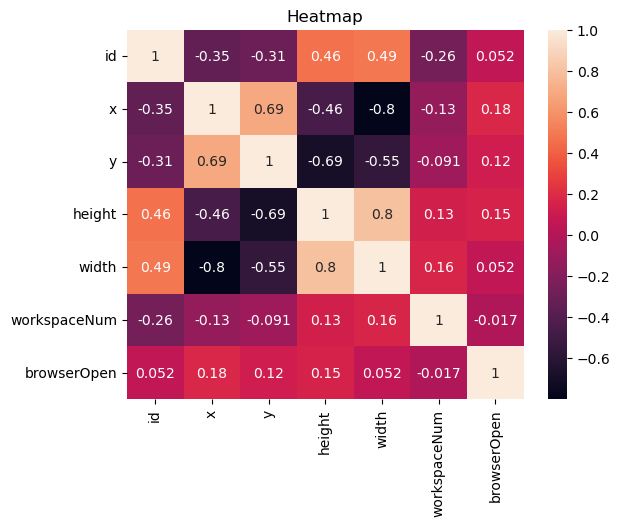

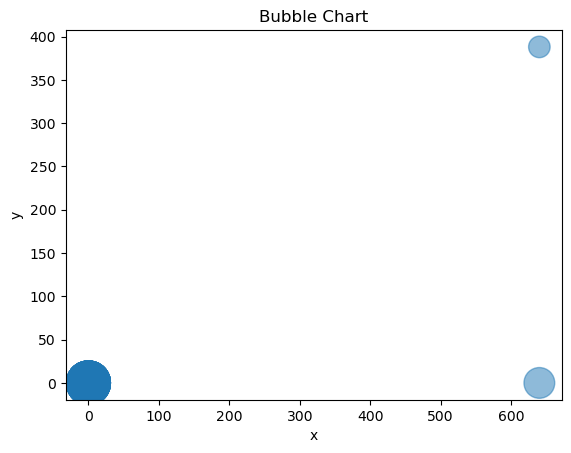

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
import seaborn as sns
import matplotlib.pyplot as plt
# Load the data
data = pd.read_csv('./window.csv', header=0)

sns.heatmap(data.corr(), annot=True)
plt.title("Heatmap")
plt.show()

plt.scatter(data['x'], data['y'], s=data['height']*data['width']/1000, alpha=0.5)
plt.title("Bubble Chart")
plt.xlabel("x")
plt.ylabel("y")
plt.show()
# Convert categorical variables to numerical using one-hot encoding



In [2]:
data = pd.get_dummies(data, columns=['name'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data.drop('workspaceNum', axis=1), 
                                                    data['workspaceNum'], 
                                                    test_size=0.2, 
                                                    random_state=42)

# Train the decision tree classifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Make predictions on the testing set and evaluate the accuracy
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)


Accuracy: 0.8333333333333334


In [3]:
import pickle
filename = 'ai_tiling_model.pkl'
with open(filename, 'wb') as file:
    pickle.dump(model, file)

DecisionTreeClassifier(): 0.8333333333333334
RandomForestClassifier(): 0.8333333333333334
GradientBoostingClassifier(): 0.8333333333333334
LogisticRegression(): 0.5
KNeighborsClassifier(): 0.6666666666666666
SVC(kernel='linear', random_state=42): 0.6666666666666666
GaussianNB(): 0.6666666666666666


C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Text(0, 0.5, 'Accuracy')

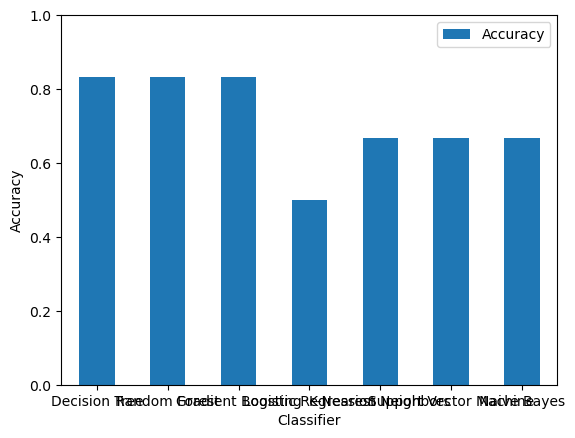

In [4]:
classifiers = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Logistic Regression': LogisticRegression(),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
    'Support Vector Machine': SVC(kernel='linear', random_state=42),
    'Naive Bayes': GaussianNB()
}

accuracy_scores = []
for name, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append((name, accuracy))
    print(str(classifier)+": "+ str(accuracy))

# Plot the accuracy scores using a bar plot
df = pd.DataFrame.from_records(accuracy_scores, columns=['Classifier', 'Accuracy'])
width = 1
ax = df.plot.bar(x='Classifier', y='Accuracy', rot=0)

ax.set_ylim([0, 1])
ax.set_ylabel('Accuracy')
